In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Data Preparation

## Initiate the Dataframe

In [2]:
dfAccident = pd.read_csv('Accidents0515.csv', nrows=500000)
dfAccident.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 
                         'Longitude', 'Latitude', 'Police_Force', 
                         'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', 
                        '1st_Road_Number', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                        '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                        'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
                        'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'], inplace=True)
dfAccident.head()

Accident_Index  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0  200501BS00001                  2                   1                     1   
1  200501BS00002                  3                   1                     1   
2  200501BS00003                  3                   2                     1   
3  200501BS00004                  3                   1                     1   
4  200501BS00005                  3                   1                     1   

         Date  Day_of_Week   Time  Road_Type  Speed_limit  Light_Conditions  \
0  04/01/2005            3  17:42          6           30                 1   
1  05/01/2005            4  17:36          3           30                 4   
2  06/01/2005            5  00:15          6           30                 4   
3  07/01/2005            6  10:35          6           30                 1   
4  10/01/2005            2  21:13          6           30                 7   

   Weather_Conditions  Road_Surface_Conditions  
0                   2                        2  
1                   1                        1  
2                   1                        1  
3                   1                        1  
4                   1                        2

In [3]:
dfCasualty = pd.read_csv('Casualties0515.csv', nrows=500000)
dfCasualty.drop(columns=['Vehicle_Reference', 'Casualty_Reference', 
                         'Age_Band_of_Casualty', 'Pedestrian_Location', 'Pedestrian_Movement', 
                         'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Casualty_Home_Area_Type'], 
                inplace=True)
dfCasualty.head()

Accident_Index  Casualty_Class  Sex_of_Casualty  Age_of_Casualty  \
0  200501BS00001               3                1               37   
1  200501BS00002               2                1               37   
2  200501BS00003               1                1               62   
3  200501BS00004               3                1               30   
4  200501BS00005               1                1               49   

   Casualty_Severity  Car_Passenger  Casualty_Type  
0                  2              0              0  
1                  3              0             11  
2                  3              0              9  
3                  3              0              0  
4                  3              0              3

In [4]:
dfVehicle = pd.read_csv('Vehicles0515.csv',nrows=500000)
dfVehicle.drop(columns=['Engine_Capacity_(CC)', 'Age_Band_of_Driver', 
                         'Journey_Purpose_of_Driver', 'Was_Vehicle_Left_Hand_Drive?', '1st_Point_of_Impact', 
                        'Hit_Object_off_Carriageway', 'Vehicle_Leaving_Carriageway', 
                         'Hit_Object_in_Carriageway', 'Skidding_and_Overturning', 
                        'Vehicle_Location-Restricted_Lane', 'Towing_and_Articulation', 'Vehicle_Reference', 'Driver_IMD_Decile', 'Propulsion_Code'],
               inplace=True)
dfVehicle.head()

Accident_Index  Vehicle_Type  Vehicle_Manoeuvre  Junction_Location  \
0  200501BS00001             9                 18                  0   
1  200501BS00002            11                  4                  3   
2  200501BS00003            11                 17                  0   
3  200501BS00003             9                  2                  0   
4  200501BS00004             9                 18                  0   

   Sex_of_Driver  Age_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  
0              2             74              -1                      1  
1              1             42               3                     -1  
2              1             35               5                      1  
3              1             62               6                      1  
4              2             49               4                      1

## Joining the Dataframe

In [5]:
dfAccident =  dfAccident.merge(dfCasualty, on='Accident_Index')
dfFinal = dfAccident.merge(dfVehicle, on='Accident_Index')
dfFinal.head()

Accident_Index  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0  200501BS00001                  2                   1                     1   
1  200501BS00002                  3                   1                     1   
2  200501BS00003                  3                   2                     1   
3  200501BS00003                  3                   2                     1   
4  200501BS00004                  3                   1                     1   

         Date  Day_of_Week   Time  Road_Type  Speed_limit  Light_Conditions  \
0  04/01/2005            3  17:42          6           30                 1   
1  05/01/2005            4  17:36          3           30                 4   
2  06/01/2005            5  00:15          6           30                 4   
3  06/01/2005            5  00:15          6           30                 4   
4  07/01/2005            6  10:35          6           30                 1   

   Weather_Conditions  Road_Surface_Conditions  Casualty_Class  \
0                   2                        2               3   
1                   1                        1               2   
2                   1                        1               1   
3                   1                        1               1   
4                   1                        1               3   

   Sex_of_Casualty  Age_of_Casualty  Casualty_Severity  Car_Passenger  \
0                1               37                  2              0   
1                1               37                  3              0   
2                1               62                  3              0   
3                1               62                  3              0   
4                1               30                  3              0   

   Casualty_Type  Vehicle_Type  Vehicle_Manoeuvre  Junction_Location  \
0              0             9                 18                  0   
1             11            11                  4                  3   
2              9            11                 17                  0   
3              9             9                  2                  0   
4              0             9                 18                  0   

   Sex_of_Driver  Age_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  
0              2             74              -1                      1  
1              1             42               3                     -1  
2              1             35               5                      1  
3              1             62               6                      1  
4              2             49               4                      1

## Adding New Series and Fill NaN values

In [6]:
def checkCasualty(x):
    if x['Casualty_Severity'] == 3 & x['Accident_Severity'] == 3:
        return 0
    else:
        return 1

In [7]:
checkAccident = dfFinal[['Casualty_Severity', 'Accident_Severity']].apply(checkCasualty, axis = 1)

In [8]:
dfFinal['High_Risk'] = checkAccident

In [9]:
dfFinal.columns[dfFinal.isna().any()].tolist()

['Time']

In [10]:
dfFinal['Time'].mode()

0    17:00
dtype: object

In [11]:
len(dfFinal[dfFinal['Time'].isna()])

53

In [12]:
dfFinal[dfFinal['Time'].isna()].head()

Accident_Index  Accident_Severity  Number_of_Vehicles  \
65515   200504AL05142                  3                   2   
65516   200504AL05142                  3                   2   
292535  2005350073505                  3                   1   
292657  2005350083505                  3                   2   
292658  2005350083505                  3                   2   

        Number_of_Casualties        Date  Day_of_Week Time  Road_Type  \
65515                      1  30/11/2005            4  NaN          6   
65516                      1  30/11/2005            4  NaN          6   
292535                     1  09/02/2005            4  NaN          6   
292657                     1  16/02/2005            4  NaN          6   
292658                     1  16/02/2005            4  NaN          6   

        Speed_limit  Light_Conditions  Weather_Conditions  \
65515            30                 1                   9   
65516            30                 1                   9   
292535           30                 7                   9   
292657           30                 4                   1   
292658           30                 4                   1   

        Road_Surface_Conditions  Casualty_Class  Sex_of_Casualty  \
65515                        -1               1                1   
65516                        -1               1                1   
292535                        1               1                2   
292657                        1               1                1   
292658                        1               1                1   

        Age_of_Casualty  Casualty_Severity  Car_Passenger  Casualty_Type  \
65515                20                  3              0              9   
65516                20                  3              0              9   
292535               43                  3              0              9   
292657               69                  3              0              1   
292658               69                  3              0              1   

        Vehicle_Type  Vehicle_Manoeuvre  Junction_Location  Sex_of_Driver  \
65515              9                 18                 -1              1   
65516              9                  3                 -1              1   
292535             9                 18                  1              2   
292657            19                  5                  6              1   
292658             1                 18                  2              1   

        Age_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  High_Risk  
65515              20              -1                     -1          0  
65516              31               3                     -1          0  
292535             43               7                      1          0  
292657             53              -1                      1          0  
292658             69              -1                      3          0

In [13]:
fillNaTime = dfFinal.groupby('High_Risk')['Time'].apply(lambda x: x.mode())
fillNaTime

High_Risk   
0          0    17:00
1          0    17:30
Name: Time, dtype: object

In [14]:
dfFinal['Time'].fillna('17:00', inplace=True)

In [15]:
dfFinal.columns[dfFinal.isna().any()].tolist()

[]

In [16]:
def get_sec(time_str):
    h, m= time_str.split(':')
    return int(h) * 3600 + int(m) * 60

In [17]:
checkTime = dfFinal['Time'].apply(get_sec)
checkMonth = dfFinal['Date'].apply(lambda x : int(x[3:5]))

In [18]:
dfFinal['Time_In_Seconds'] = checkTime
dfFinal['Months'] = checkMonth

In [19]:
dfFinal.head()

Accident_Index  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0  200501BS00001                  2                   1                     1   
1  200501BS00002                  3                   1                     1   
2  200501BS00003                  3                   2                     1   
3  200501BS00003                  3                   2                     1   
4  200501BS00004                  3                   1                     1   

         Date  Day_of_Week   Time  Road_Type  Speed_limit  Light_Conditions  \
0  04/01/2005            3  17:42          6           30                 1   
1  05/01/2005            4  17:36          3           30                 4   
2  06/01/2005            5  00:15          6           30                 4   
3  06/01/2005            5  00:15          6           30                 4   
4  07/01/2005            6  10:35          6           30                 1   

   Weather_Conditions  Road_Surface_Conditions  Casualty_Class  \
0                   2                        2               3   
1                   1                        1               2   
2                   1                        1               1   
3                   1                        1               1   
4                   1                        1               3   

   Sex_of_Casualty  Age_of_Casualty  Casualty_Severity  Car_Passenger  \
0                1               37                  2              0   
1                1               37                  3              0   
2                1               62                  3              0   
3                1               62                  3              0   
4                1               30                  3              0   

   Casualty_Type  Vehicle_Type  Vehicle_Manoeuvre  Junction_Location  \
0              0             9                 18                  0   
1             11            11                  4                  3   
2              9            11                 17                  0   
3              9             9                  2                  0   
4              0             9                 18                  0   

   Sex_of_Driver  Age_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  \
0              2             74              -1                      1   
1              1             42               3                     -1   
2              1             35               5                      1   
3              1             62               6                      1   
4              2             49               4                      1   

   High_Risk  Time_In_Seconds  Months  
0          1            63720       1  
1          0            63360       1  
2          0              900       1  
3          0              900       1  
4          0            38100       1

## Visualize the Data



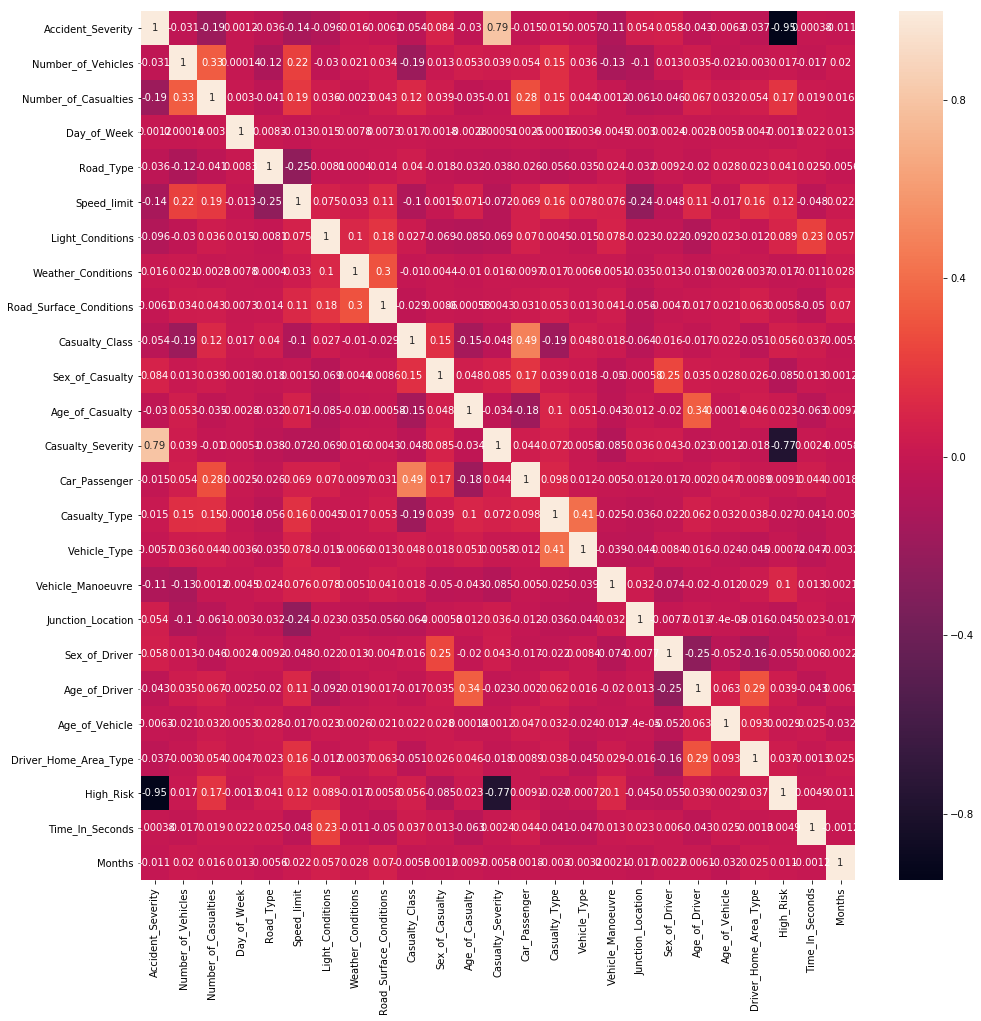

In [20]:
plt.figure(figsize = (16,16))
sns.heatmap(dfFinal.corr(), annot=True)

In [21]:
print('Low Risk Winter: ' + str(len(dfFinal[((dfFinal['Months'] <= 2) | (dfFinal['Months'] >= 12)) & dfFinal['High_Risk'] == 0])))
print('High Risk Winter: ' + str(len(dfFinal[((dfFinal['Months'] <= 2) | (dfFinal['Months'] >= 12)) & dfFinal['High_Risk'] == 1])))
print('\n')
print('Low Risk Spring: ' + str(len(dfFinal[((dfFinal['Months'] >= 3) & (dfFinal['Months'] <= 5)) & dfFinal['High_Risk'] == 0])))
print('High Risk Spring: ' + str(len(dfFinal[((dfFinal['Months'] >= 3) & (dfFinal['Months'] <= 5)) & dfFinal['High_Risk'] == 1])))
print('\n')
print('Low Risk Summer: ' + str(len(dfFinal[((dfFinal['Months'] >= 6) & (dfFinal['Months'] <= 8)) & dfFinal['High_Risk'] == 0])))
print('High Risk Summer: ' + str(len(dfFinal[((dfFinal['Months'] >= 6) & (dfFinal['Months'] <= 8)) & dfFinal['High_Risk'] == 1])))
print('\n')
print('Low Risk Autumn: ' + str(len(dfFinal[((dfFinal['Months'] >= 9) & (dfFinal['Months'] <= 11)) & dfFinal['High_Risk'] == 0])))
print('High Risk Autumn: ' + str(len(dfFinal[((dfFinal['Months'] >= 9) & (dfFinal['Months'] <= 11)) & dfFinal['High_Risk'] == 1])))

Low Risk Winter: 691204
High Risk Winter: 26235


Low Risk Spring: 691510
High Risk Spring: 25929


Low Risk Summer: 687701
High Risk Summer: 29738


Low Risk Autumn: 687586
High Risk Autumn: 29853


In [22]:
len(dfFinal[(dfFinal['Casualty_Severity'] == 3) & (dfFinal['Accident_Severity'] == 3)])

605684

In [23]:
dfFinal.groupby('Months')['High_Risk'].count().plot(kind = 'bar')

In [24]:
dfFinal.groupby('Number_of_Vehicles')['High_Risk'].count().plot(kind = 'bar')

In [25]:
dfFinal.groupby('Day_of_Week')['High_Risk'].count().plot(kind = 'bar')

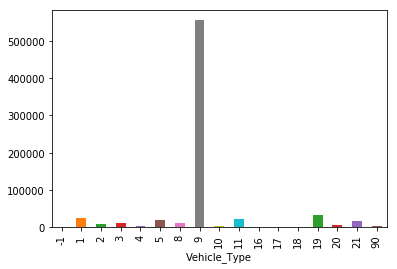

In [26]:
dfFinal.groupby('Vehicle_Type')['High_Risk'].count().plot(kind = 'bar')

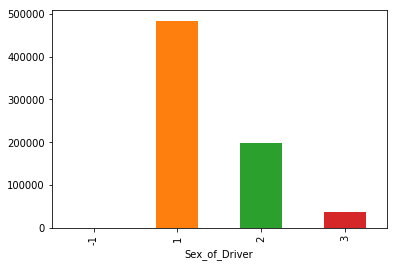

In [27]:
dfFinal.groupby('Sex_of_Driver')['High_Risk'].count().plot(kind = 'bar')

In [28]:
dfFinal.groupby('Road_Type')['High_Risk'].count().plot(kind = 'bar')

In [29]:
dfFinal.groupby('Weather_Conditions')['High_Risk'].count().plot(kind = 'bar')

# Making A Model

In [30]:
dfFinal.head()

Accident_Index  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0  200501BS00001                  2                   1                     1   
1  200501BS00002                  3                   1                     1   
2  200501BS00003                  3                   2                     1   
3  200501BS00003                  3                   2                     1   
4  200501BS00004                  3                   1                     1   

         Date  Day_of_Week   Time  Road_Type  Speed_limit  Light_Conditions  \
0  04/01/2005            3  17:42          6           30                 1   
1  05/01/2005            4  17:36          3           30                 4   
2  06/01/2005            5  00:15          6           30                 4   
3  06/01/2005            5  00:15          6           30                 4   
4  07/01/2005            6  10:35          6           30                 1   

   Weather_Conditions  Road_Surface_Conditions  Casualty_Class  \
0                   2                        2               3   
1                   1                        1               2   
2                   1                        1               1   
3                   1                        1               1   
4                   1                        1               3   

   Sex_of_Casualty  Age_of_Casualty  Casualty_Severity  Car_Passenger  \
0                1               37                  2              0   
1                1               37                  3              0   
2                1               62                  3              0   
3                1               62                  3              0   
4                1               30                  3              0   

   Casualty_Type  Vehicle_Type  Vehicle_Manoeuvre  Junction_Location  \
0              0             9                 18                  0   
1             11            11                  4                  3   
2              9            11                 17                  0   
3              9             9                  2                  0   
4              0             9                 18                  0   

   Sex_of_Driver  Age_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  \
0              2             74              -1                      1   
1              1             42               3                     -1   
2              1             35               5                      1   
3              1             62               6                      1   
4              2             49               4                      1   

   High_Risk  Time_In_Seconds  Months  
0          1            63720       1  
1          0            63360       1  
2          0              900       1  
3          0              900       1  
4          0            38100       1

In [31]:
dfFinal.describe()

Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
count      717439.000000       717439.000000         717439.000000   
mean            2.822958            2.273310              2.020655   
std             0.433871            1.147628              1.720866   
min             1.000000            1.000000              1.000000   
25%             3.000000            2.000000              1.000000   
50%             3.000000            2.000000              1.000000   
75%             3.000000            2.000000              2.000000   
max             3.000000           20.000000             45.000000   

         Day_of_Week      Road_Type    Speed_limit  Light_Conditions  \
count  717439.000000  717439.000000  717439.000000     717439.000000   
mean        4.126407       5.118533      40.718807          1.942161   
std         1.950755       1.627949      15.006808          1.613182   
min         1.000000       1.000000      10.000000          1.000000   
25%         2.000000       3.000000      30.000000          1.000000   
50%         4.000000       6.000000      30.000000          1.000000   
75%         6.000000       6.000000      60.000000          4.000000   
max         7.000000       9.000000      70.000000          7.000000   

       Weather_Conditions  Road_Surface_Conditions  Casualty_Class  \
count       717439.000000            717439.000000   717439.000000   
mean             1.534112                 1.354278        1.409427   
std              1.557971                 0.575366        0.620125   
min             -1.000000                -1.000000        1.000000   
25%              1.000000                 1.000000        1.000000   
50%              1.000000                 1.000000        1.000000   
75%              1.000000                 2.000000        2.000000   
max              9.000000                 5.000000        3.000000   

       Sex_of_Casualty  Age_of_Casualty  Casualty_Severity  Car_Passenger  \
count    717439.000000    717439.000000      717439.000000  717439.000000   
mean          1.419944        33.725531           2.882493       0.312241   
std           0.495874        18.195986           0.353183       0.612823   
min          -1.000000        -1.000000           1.000000      -1.000000   
25%           1.000000        20.000000           3.000000       0.000000   
50%           1.000000        31.000000           3.000000       0.000000   
75%           2.000000        45.000000           3.000000       0.000000   
max           2.000000        99.000000           3.000000       2.000000   

       Casualty_Type   Vehicle_Type  Vehicle_Manoeuvre  Junction_Location  \
count  717439.000000  717439.000000      717439.000000      717439.000000   
mean        8.064408       9.730402          12.796418           2.407522   
std         6.233419       6.919735           6.160674           3.116457   
min         0.000000      -1.000000          -1.000000          -1.000000   
25%         9.000000       9.000000           7.000000           0.000000   
50%         9.000000       9.000000          17.000000           1.000000   
75%         9.000000       9.000000          18.000000           5.000000   
max        90.000000      90.000000          18.000000           8.000000   

       Sex_of_Driver  Age_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  \
count  717439.000000  717439.000000   717439.000000          717439.000000   
mean        1.375904      33.637576        4.103397               0.789950   
std         0.579593      18.683244        4.974437               1.135107   
min        -1.000000      -1.000000       -1.000000              -1.000000   
25%         1.000000      22.000000       -1.000000               1.000000   
50%         1.000000      33.000000        3.000000               1.000000   
75%         2.000000      45.000000        8.000000               1.000000   
max         3.000000      99.000000       84.000000               3.000000   

     

In [32]:
batasMin = dfFinal['Time_In_Seconds'].std() - (2 * dfFinal['Time_In_Seconds'].std())
batasMax = dfFinal['Time_In_Seconds'].std() + (2 * dfFinal['Time_In_Seconds'].std())
print(batasMin)
print(batasMax)

-18392.488678759037
55177.46603627711


In [33]:
len(dfFinal[(dfFinal.Weather_Conditions == -1) | (dfFinal.Road_Surface_Conditions == -1) | (dfFinal.Vehicle_Type == -1) |
    (dfFinal.Junction_Location == -1) | (dfFinal.Sex_of_Driver == -1) | (dfFinal.Age_of_Driver == -1) | 
    (dfFinal.Age_of_Vehicle == -1) | (dfFinal.Driver_Home_Area_Type == -1)])

330800

In [34]:
dfFinal.drop(dfFinal[(dfFinal.Weather_Conditions == -1) | (dfFinal.Road_Surface_Conditions == -1) | (dfFinal.Vehicle_Type == -1) |
    (dfFinal.Junction_Location == -1) | (dfFinal.Sex_of_Driver == -1) | (dfFinal.Age_of_Driver == -1) | 
    (dfFinal.Age_of_Vehicle == -1) | (dfFinal.Driver_Home_Area_Type == -1)].index, inplace=True)

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score

In [36]:
X = dfFinal.drop(['Accident_Index', 'Time', 'Casualty_Severity', 'Accident_Severity', 'High_Risk', 'Sex_of_Casualty',
                 'Casualty_Class', 'Casualty_Type', 'Age_of_Casualty', 'Number_of_Casualties', 'Date', 'Number_of_Vehicles', 
                  'Car_Passenger', 'Vehicle_Manoeuvre', 'Driver_Home_Area_Type', 'Road_Surface_Conditions'], axis=1)
y = dfFinal['High_Risk']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.20)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, roc_auc_score, confusion_matrix

In [40]:
# KNeighborsClassifier(weights='distance', n_neighbors=11)
rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=20, class_weight={0:1, 1:2})

In [41]:
rocAuc = cross_val_score(rfc,X_train2,y_train2, scoring = 'roc_auc', cv=5)
print('AUC Score for this model : ' , rocAuc)

AUC Score for this model :  [0.77332392 0.76693275 0.76096044 0.76282796 0.77296657]


In [42]:
rfc.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Result

In [43]:
predict = rfc.predict(X_test2)
predictProb = rfc.predict_proba(X_test2)

In [44]:
print(confusion_matrix(y_test2,predict))
print(classification_report(y_test2, predict))
print(f"Recall: {recall_score(y_test2, predict)}")
print(f"Roc Auc Score: {roc_auc_score(y_test2, predictProb[:,1])}")

[[50821  1245]
 [ 7741  2056]]
             precision    recall  f1-score   support

          0       0.87      0.98      0.92     52066
          1       0.62      0.21      0.31      9797

avg / total       0.83      0.85      0.82     61863

Recall: 0.20986016127385934
Roc Auc Score: 0.78087912507747


In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train2, y_train2)

In [47]:
pd.Series(y_ros).value_counts()

1    208816
0    208816
dtype: int64

In [ ]:
rfc.fit(X_ros, y_ros)

## Testing stage 1

In [ ]:
predict = rfc.predict(X_test2)
predictProb = rfc.predict_proba(X_test2)

In [ ]:
print(confusion_matrix(y_test2,predict))
print(classification_report(y_test2, predict))
print(f"Recall: {recall_score(y_test2, predict)}")
print(f"Roc Auc Score: {roc_auc_score(y_test2, predictProb[:,1])}")

## Testing stage 2

In [ ]:
predict1 = rfc.predict(X_test)
predictProb1 = rfc.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test,predict1))
print(classification_report(y_test, predict1))
print(f"Recall: {recall_score(y_test, predict1)}")
print(f"Roc Auc Score: {roc_auc_score(y_test, predictProb1[:,1])}")

## Testing stage 3

In [ ]:
listData = [0, 0, 30, 1, 1, 0, 9, 1, 40, 3, 900, 11]
for x, v in zip(range(len(listData)), range(len(X.columns))):
    print(f"{listData[x]} - {X.columns[v]}")

In [ ]:
myPrediction = pd.DataFrame(data=[listData], 
                            columns=X.columns)
# myPrediction
predictProba3 = rfc.predict_proba(myPrediction)
predict3 = rfc.predict(myPrediction)
print(predict3)
print(predictProba3)
# print(X.columns)

In [ ]:
# estimator = rfc.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='ukaccident.dot', 
#                 feature_names = X.columns,
#                 class_names = y.name,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, predictProb1)
plt.show()

In [ ]:
# feature_importance = rfc.feature_importances_
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.figure(figsize=[20, 16])
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')

# plt.yticks(pos, dfFinal.drop(['Accident_Index', 'Time', 'Casualty_Severity', 'Accident_Severity', 'High_Risk', 'Sex_of_Casualty',
#                  'Casualty_Class', 'Casualty_Type', 'Age_of_Casualty', 'Number_of_Casualties', 'Date', 'Number_of_Vehicles', 
#                   'Car_Passenger', 'Vehicle_Manoeuvre'], axis=1).columns.values[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [ ]:
coef1 = pd.Series(rfc.feature_importances_, dfFinal.drop(['Accident_Index', 'Time', 'Casualty_Severity', 'Accident_Severity', 'High_Risk', 'Sex_of_Casualty',
                 'Casualty_Class', 'Casualty_Type', 'Age_of_Casualty', 'Number_of_Casualties', 'Date', 'Number_of_Vehicles', 
                  'Car_Passenger', 'Vehicle_Manoeuvre', 'Driver_Home_Area_Type', 'Road_Surface_Conditions'], axis=1).columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

In [ ]:
dfFinalToCsv = dfFinal.drop(['Accident_Index', 'Time', 'Casualty_Severity', 'Accident_Severity', 'High_Risk', 'Sex_of_Casualty',
                 'Casualty_Class', 'Casualty_Type', 'Age_of_Casualty', 'Number_of_Casualties', 'Date', 'Number_of_Vehicles', 
                  'Car_Passenger', 'Vehicle_Manoeuvre', 'Driver_Home_Area_Type', 'Road_Surface_Conditions'], axis=1)
dfFinalToCsv.to_csv('dfUKAccident.csv', index=False)

In [ ]:
import pickle
filename = 'rfc_uk_data_accident.sav'
pickle.dump(rfc, open(filename, 'wb'))